## About Dataset
##### Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

##### Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

##### It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.


In [3]:
# for structured data manupulation, data exploration 
import pandas as pd

# for numerical computin in python
import numpy as np

# for data visulisation and graph ploting 
import matplotlib.pyplot as plt

# for  scatter plots, heatmaps, distribution plots
import seaborn as sns

# for spliting data in train and test 
from sklearn.model_selection import train_test_split

# for ploting the data in decision tree import decision tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# for data preprocessing 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

In [4]:
#import the datasets
df = pd.read_csv("Data Set/drug200.csv", index_col=0)
df.tail(5)

,Sex,BP,Cholesterol,Na_to_K,Drug
Age,,,,,
56,F,LOW,HIGH,11.567,drugC
16,M,LOW,HIGH,12.006,drugC
52,M,NORMAL,HIGH,9.894,drugX
23,M,NORMAL,NORMAL,14.020,drugX
40,F,LOW,NORMAL,11.349,drugX


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 23 to 40
Data columns (total 5 columns):
Sex            200 non-null object
BP             200 non-null object
Cholesterol    200 non-null object
Na_to_K        200 non-null float64
Drug           200 non-null object
dtypes: float64(1), object(4)
memory usage: 9.4+ KB


In [7]:
df.duplicated()

Age
23    False
47    False
47    False
28    False
61    False
      ...  
56    False
16    False
52    False
23    False
40    False
Length: 200, dtype: bool

In [8]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [9]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [10]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [11]:
# use label encoder to convert Drugs into numbers
label_encod= preprocessing.LabelEncoder()
df['Drug'] = label_encod.fit_transform(df['Drug'])
df['Drug'].value_counts()

4    91
3    54
0    23
2    16
1    16
Name: Drug, dtype: int64

In [12]:
df['Sex']= label_encod.fit_transform(df['Sex'])
df['BP']= label_encod.fit_transform(df['BP'])
df['Cholesterol'] = label_encod.fit_transform(df['Cholesterol'])

In [13]:
df.head()

,Sex,BP,Cholesterol,Na_to_K,Drug
Age,,,,,
23,0,0,0,25.355,4
47,1,1,0,13.093,2
47,1,1,0,10.114,2
28,0,2,0,7.798,3
61,0,1,0,18.043,4


In [14]:
x = df.iloc[:,0:4]
y = df.iloc[:,4]

In [15]:
x

,Sex,BP,Cholesterol,Na_to_K
Age,,,,
23,0,0,0,25.355
47,1,1,0,13.093
47,1,1,0,10.114
28,0,2,0,7.798
61,0,1,0,18.043
...,...,...,...,...
56,0,1,0,11.567
16,1,1,0,12.006
52,1,2,0,9.894


In [16]:
y

Age
23    4
47    2
47    2
28    3
61    4
     ..
56    2
16    2
52    3
23    3
40    3
Name: Drug, Length: 200, dtype: int32

In [17]:
# Splitting the dataset into train and test 

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=44)

In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 4), (40, 4), (160,), (40,))

In [19]:
x_train

,Sex,BP,Cholesterol,Na_to_K
Age,,,,
51,1,0,1,11.343
37,0,0,0,13.091
32,0,0,1,10.292
59,1,0,0,13.935
50,1,0,0,7.490
...,...,...,...,...
52,1,1,1,32.922
34,1,0,0,18.703
41,0,1,1,18.739


In [20]:
y_train

Age
51    1
37    0
32    0
59    1
50    0
     ..
52    4
34    4
41    4
21    4
57    4
Name: Drug, Length: 160, dtype: int32

### Building Decision Tree Classifier using Entropy as a Criterion

In [23]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

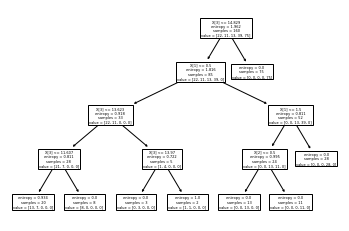

In [24]:
tree.plot_tree(model)
plt.figure

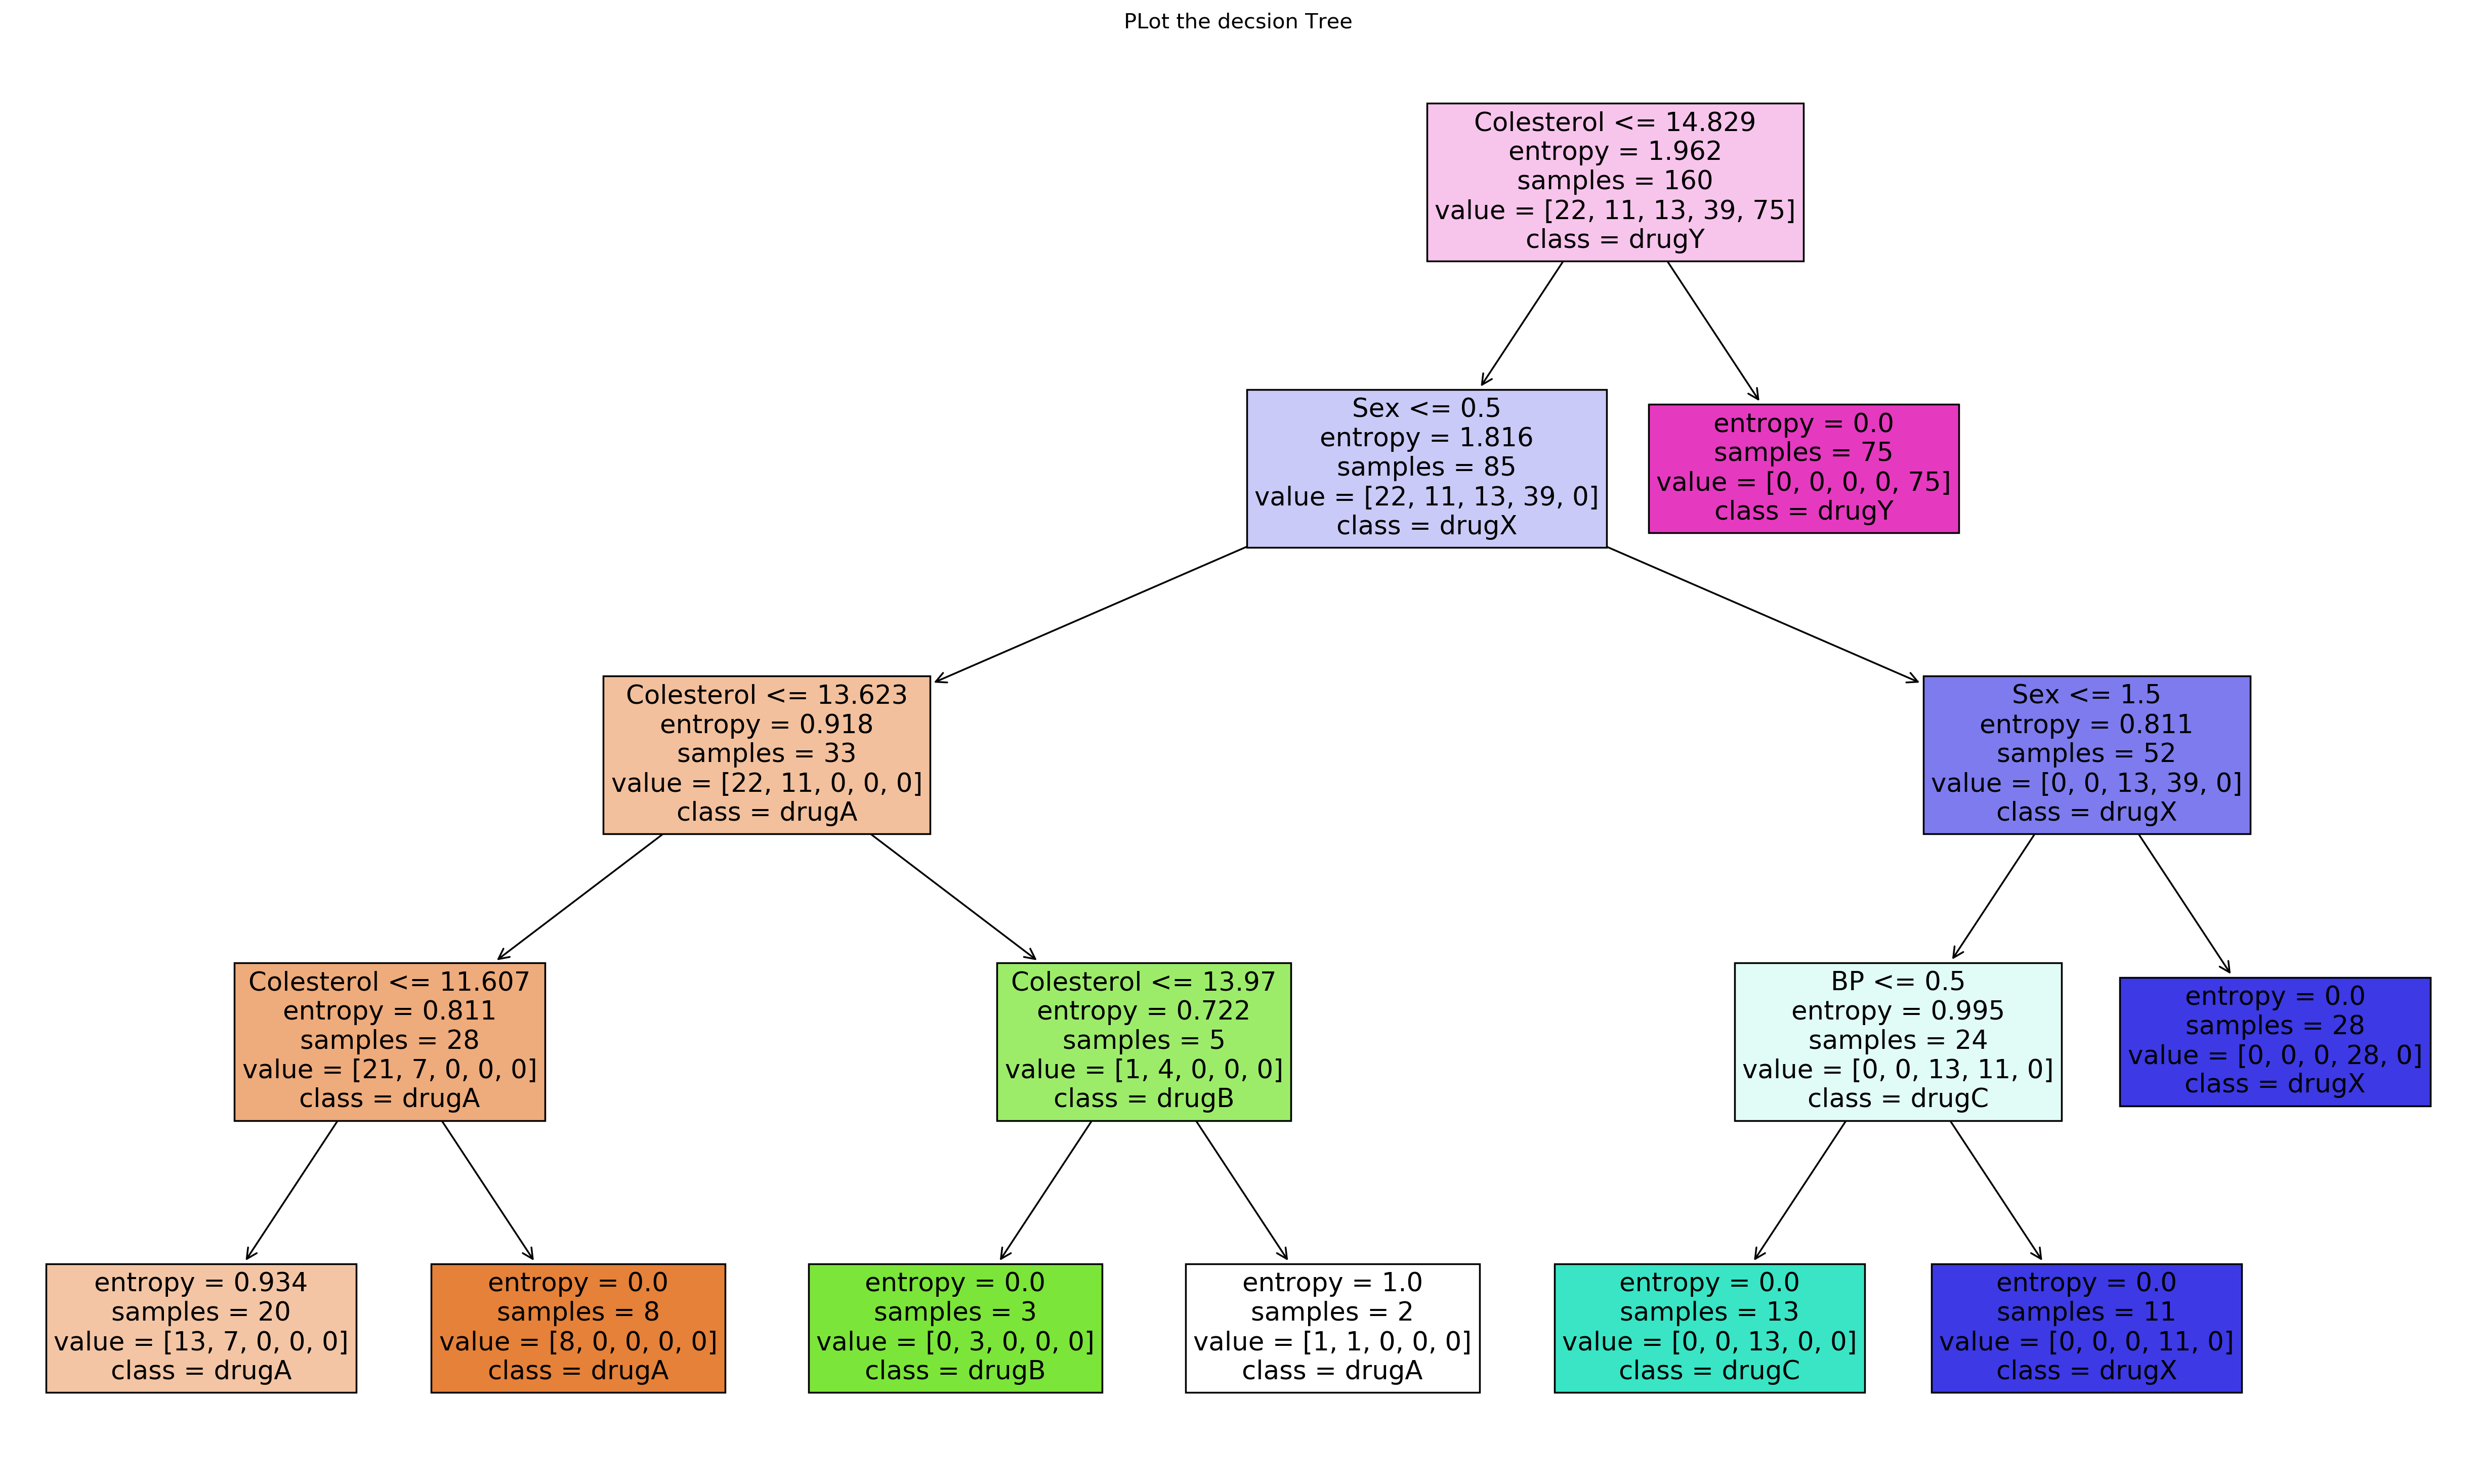

In [25]:
fn = ['Age','Sex','BP','Colesterol','Na_to_K']
cn = ['drugA','drugB','drugC','drugX','drugY']
fig,ax= plt.subplots(nrows=1,ncols=1,figsize=(25,15),dpi=250)
tree.plot_tree(model,feature_names=fn, class_names=cn ,filled=True)

ax.set_title('PLot the decsion Tree')
plt.show()

## Prediction on the Test data

In [26]:
preds = model.predict(x_test)

In [27]:
pd.Series(preds).value_counts()

4    16
3    15
0     6
2     3
dtype: int64

In [28]:
y_test

Age
74    3
41    4
53    4
39    4
48    4
32    3
68    1
28    3
20    3
53    1
22    4
47    3
20    3
60    1
43    4
54    4
46    3
66    3
50    4
68    2
25    4
66    4
60    1
41    2
43    4
49    3
59    3
55    1
37    3
39    4
23    4
58    4
35    3
64    3
36    3
23    3
59    2
47    0
15    4
68    4
Name: Drug, dtype: int32

### Crosstab : Way to understand the two way table between predicted vs actual 

In [29]:
pd.crosstab(y_test,preds)

col_0,0,2,3,4
Drug,,,,
0,1,0,0,0
1,5,0,0,0
2,0,3,0,0
3,0,0,15,0
4,0,0,0,16


In [41]:
x_test.loc[:,'preds'] = preds
x_test.loc[:,'y_test'] = y_test
x_test.head()

,Sex,BP,Cholesterol,Na_to_K,preds,y_test
Age,,,,,,
74,1,1,1,11.939,3,3
41,0,2,1,22.905,4,4
53,1,1,0,22.963,4,4
39,0,1,1,22.697,4,4
48,0,1,0,15.036,4,4


In [40]:
np.mean(preds==y_test)

0.875

## METHOD 2 - 

In [48]:
# Splitting the dataset into train and test 

x1_train,x1_test,y1_train, y1_test = train_test_split(x,y,test_size= 0.2, random_state=44)

In [49]:
model1 = DecisionTreeClassifier(criterion='gini', max_depth=4)
model1.fit(x1_train,y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

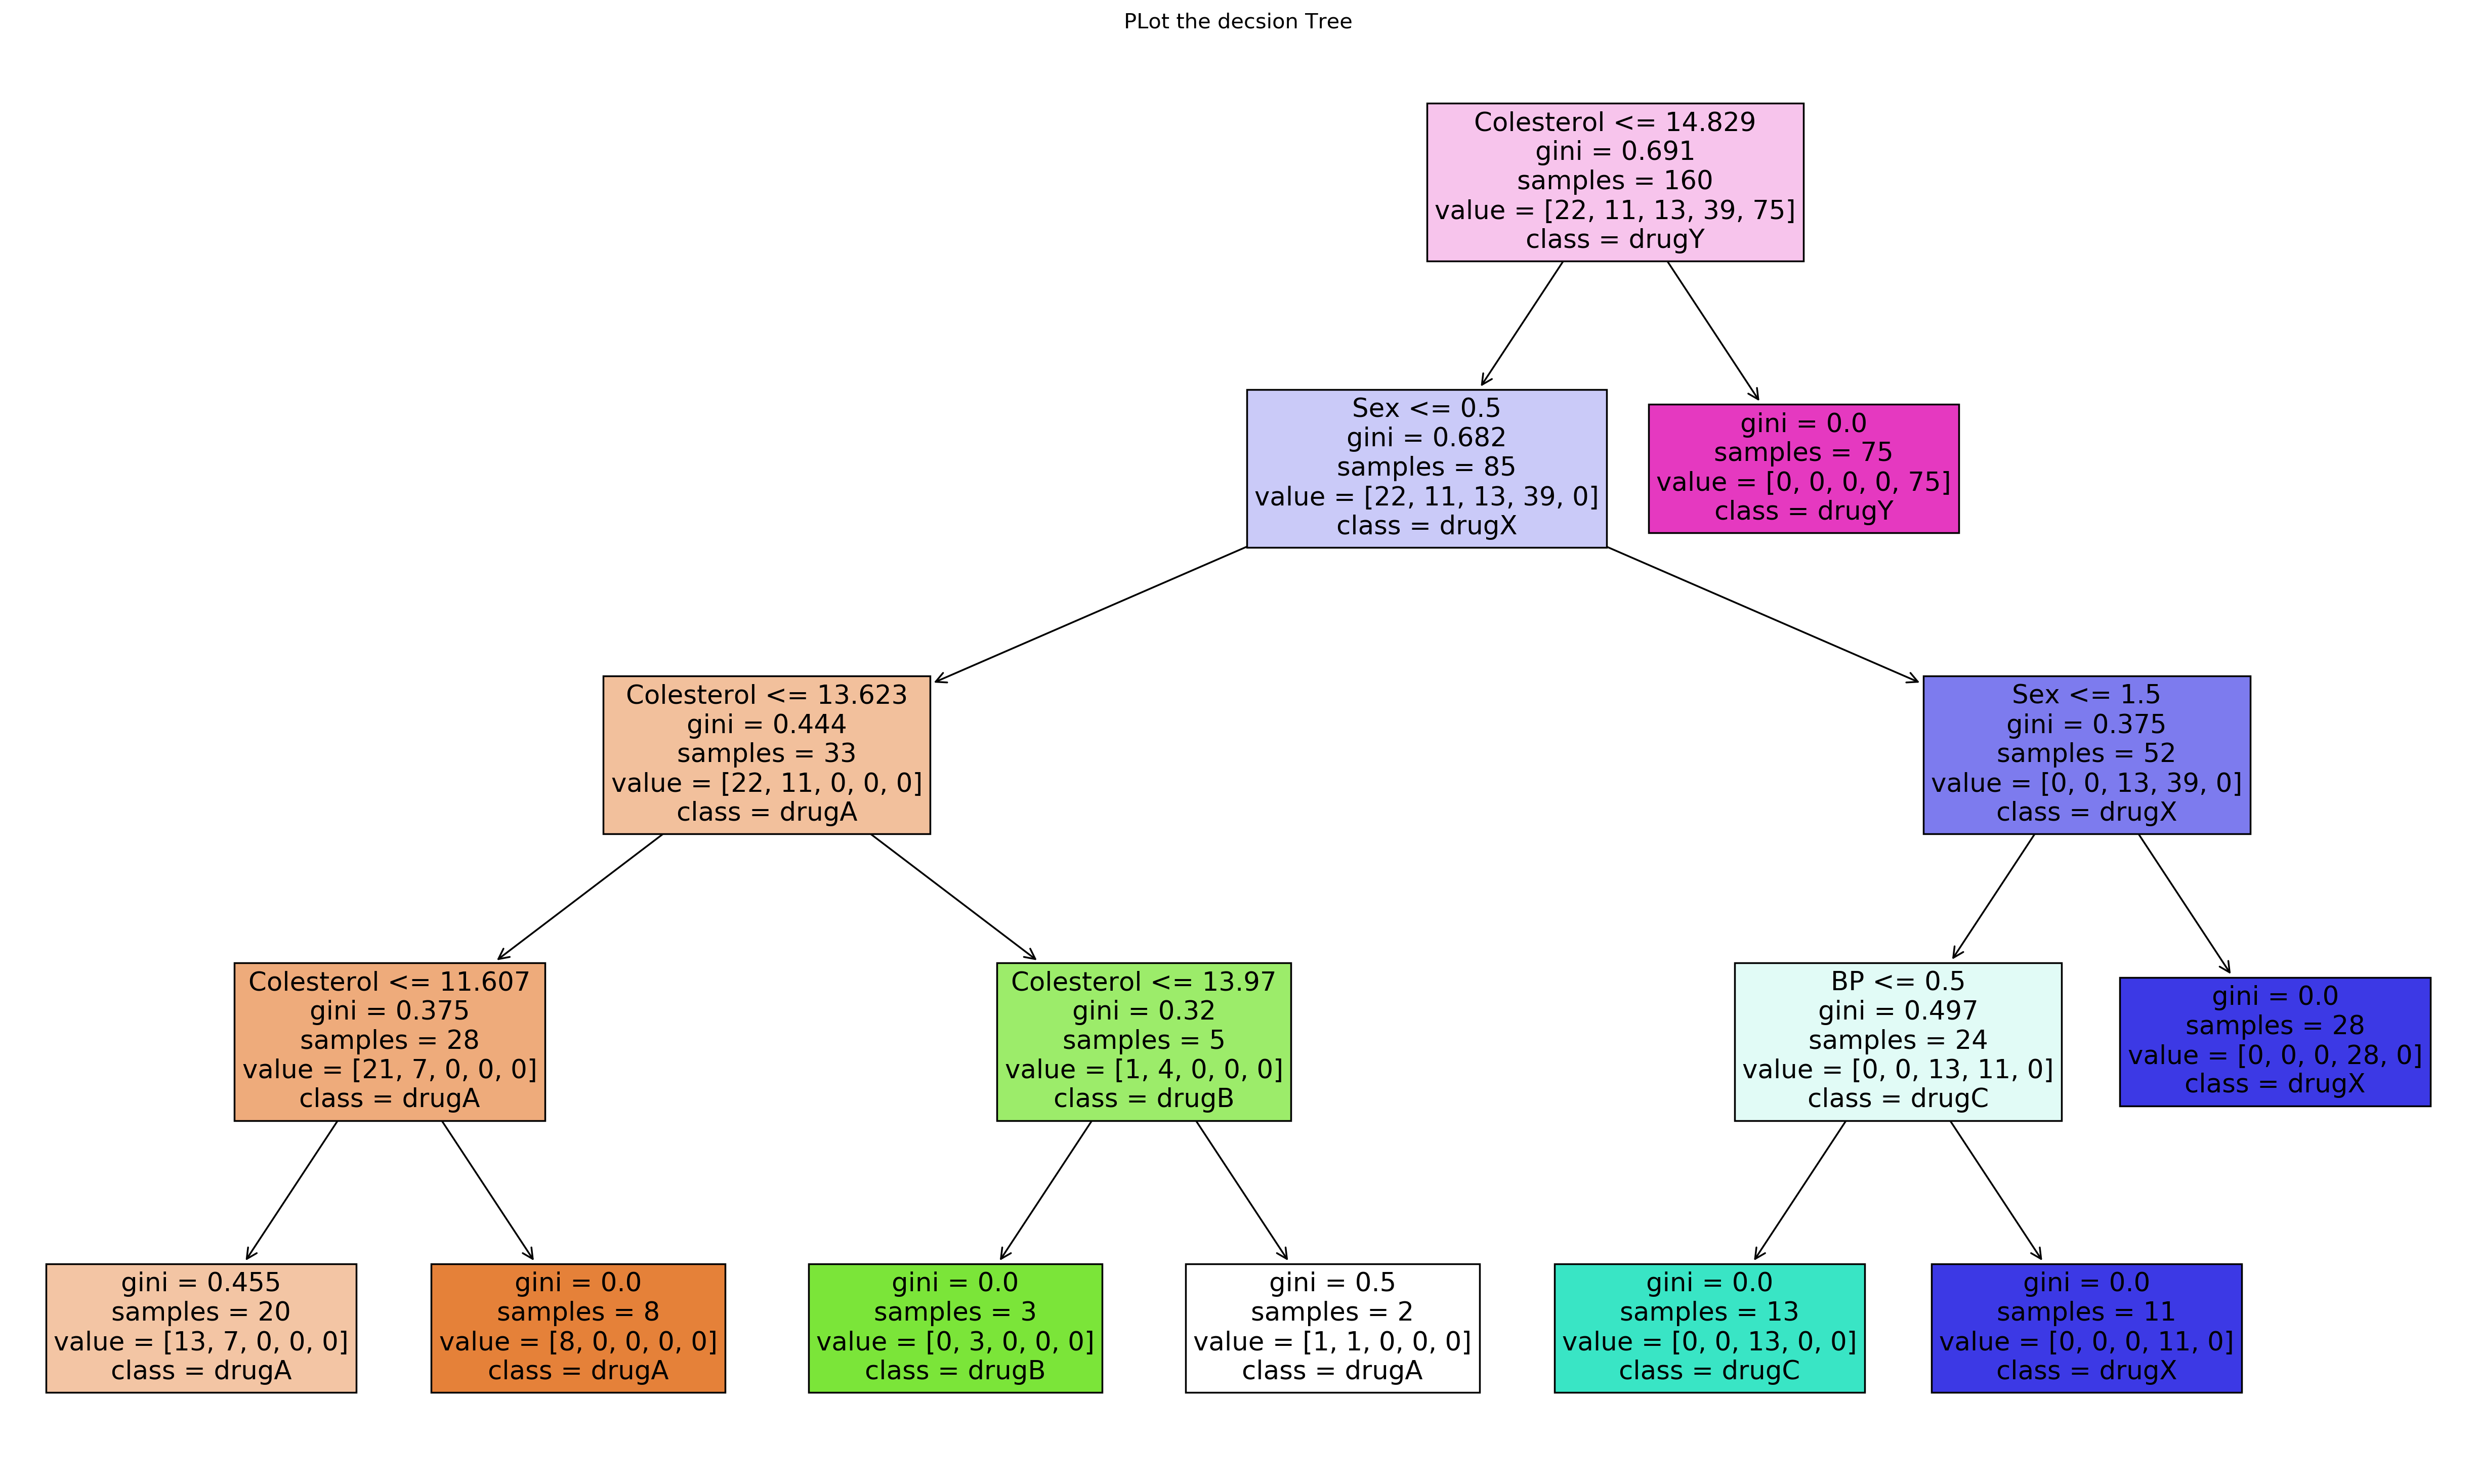

In [50]:
fn = ['Age','Sex','BP','Colesterol','Na_to_K']
cn = ['drugA','drugB','drugC','drugX','drugY']
fig,ax= plt.subplots(nrows=1,ncols=1,figsize=(25,15),dpi=250)
tree.plot_tree(model1,feature_names=fn, class_names=cn ,filled=True)

ax.set_title('PLot the decsion Tree')
plt.show()

### ## Prediction on the Test data

In [51]:
predc1= model.predict(x1_test)

In [52]:
pd.Series(predc1).value_counts()

4    16
3    15
0     6
2     3
dtype: int64

### Crosstab : Way to understand the two way table between predicted vs actual 

In [53]:
pd.crosstab(y_test,predc1)

col_0,0,2,3,4
Drug,,,,
0,1,0,0,0
1,5,0,0,0
2,0,3,0,0
3,0,0,15,0
4,0,0,0,16


In [56]:
x1_test.loc[:,'predc1'] = predc1
x1_test.loc[:,'y1_test'] = y1_test
x1_test.head()

,Sex,BP,Cholesterol,Na_to_K,predc1,y1_test
Age,,,,,,
74,1,1,1,11.939,3,3
41,0,2,1,22.905,4,4
53,1,1,0,22.963,4,4
39,0,1,1,22.697,4,4
48,0,1,0,15.036,4,4


In [59]:
aquracy = np.mean(predc1==y1_test)
print ('Model Drugs for Decision Trees  % is  :')
print (aquracy)

Model Drugs for Decision Trees  % is  :
0.875
